## Tecnicas de aceleracion de "caida"

Vemos 5 o 6 tecnicas, las voy nombrando a medida que las vamos estudiano.

Notacion: A veces usamos

$$g^{(i)} = \frac1n \sum_{j \in B_i} \nabla C_j(\theta) $$

Primera tecnica se

#### Momentum:
Lo invento Poliak en 1964 (referencia en las notas).
Lo llaman tambien el "heavy ball method".
Estos metodos funcionan cuando las elipses son muy achatadas.
Por ejemplo $z=0.1 x_1^2 + 2 x_2^2$

El algoritmo del momentum es:

\begin{eqnarray}
v^{(k)} &=& \beta v^{(k-1)} + (1 - \beta ) g^{(k)} \\
\theta^{(k)} &=& \theta^{(k-1)} - \eta v^{(k)}
\end{eqnarray}

Recordemos el algoritmo clasico


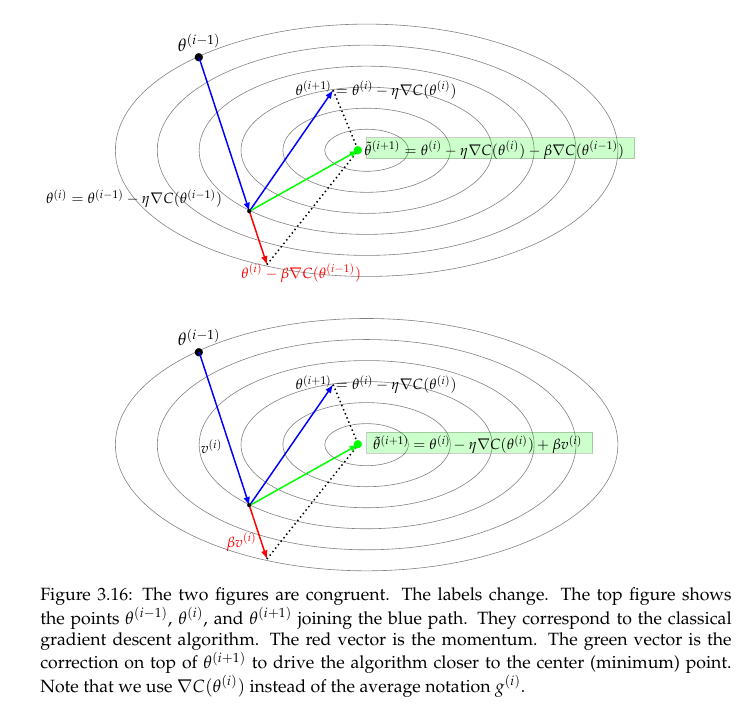


Quitemos la virgulilla (tilde)
$$\theta^{(i+1)} =  \theta^{(i)} - \eta g^{(i)} + \beta v^{(i)}  \quad , \quad (1) $$
Yo puedo escribir esto como dos ecuaciones.

(dejeme cambiar $i=k-1$, $ $k=i+1$.

\begin{eqnarray}
v^{(k)} = \beta v^{(k-1)} - \eta g^{(k-1)} \\
\theta^{(k)} = \theta^{(k-1)} + v^{(k)} 
\end{eqnarray}


Tambien podemos escribir ecuacion (1) como
$$\theta^{(i+1)} = \theta^{(i)} - \eta g^{(i)} + \beta (\theta^{(i)} - \theta^{(i-1)} ) $$

Esta es la ecuacion original de Poliak (ecuacion 9).

[why  momentum really works](https://distill.pub/2017/momentum/)

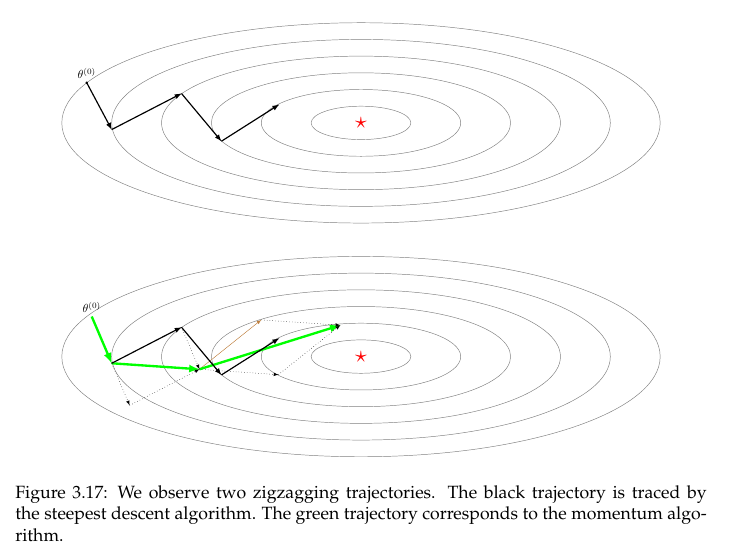

## *Nesterov*
Yurii Nesterov fue estudiante de Poliak.

La idea de Nesterov es la siguiente. Muy bien el metodo del momento (de Poliak) pero por que no evaluar
el gradiente despues de avanzar.

Momentum: Calcula el gradiente y suma

Nesterov: Suma y calcula el gradiente.



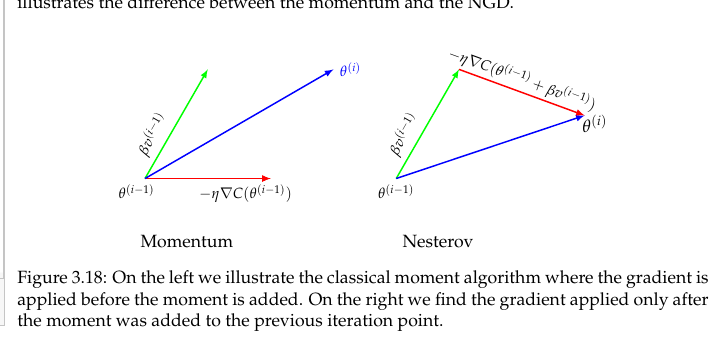

Las ecuaciones de Nesterov son:

$$ v^{(k)} = \beta v^{(k-1)} - \eta g^{(k-1)}(\theta^{(k-1)} + \beta v^{(k-1)}) $$

$$\theta^{(k)} = \theta^{(k-1)} + v^{(k)}  $$

Que problemas tiene el "momentum".

* Requiere la evalaucion de dos parametros $\beta, \eta$
* El $\eta$ es constante. 
* No se tiene en cuenta que tanto cambia el gradiente a lo largo o ancho de las curvas (superficies) de nivel.
Esto sugiere el metodo que sigue


## AdaGrad (Adaptive) .

Motivacion:
Tomemos una paraboide 

$$f(x) = \frac12 x^T A x -  b^T x + c \quad , \quad x \in \mathbb{R}^n \quad , \quad A \in \mathbb{R}^{n \times n} \quad , c \in \mathbb{R}  $$

Esta ecuacion la podemos reducir usando el teorema espectral de matrices autoadjuntas (de la clase de ML)

Si $A$ es positiva definida y simetrica ($A=X^T X$)

$$A = Q \Lambda Q^T $$
donde $Q$ es ortogonal y $\Lambda$ es diagonal con los autovalores de $A$.
Cambio el sistema coordenado.

$x' = Q^T x$, $x = Q x'$, $x'^T = x^T Q$.

Con estas variables queda
$$ f(x') = \frac12 x^T Q \Lambda Q^T x - b^T x + c = \frac12 x'^T \Lambda x' - b^T Q x' + c$$

El gradiente de esta ecuacion es

$$\nabla_{x'} f(x') = \Lambda x' - b^T Q $$.

El "condition number" si arreglamos los autovalres de mayor 
a menor es

$$ \kappa =  \frac{\lambda_1}{\lambda_n} $$ 
Si $\kappa$ es muy grande , las elipses son muyyyyy enlongadas. 


Ejemplo:

Considere la ecucacion:


$$\frac{x_1^2}{9} + x_2^2 = \frac12 \left ( \frac{2 x_1^2}{9} + 2 x^2 \right ) = \frac12 (x_1 \quad   x_2) \begin{pmatrix} 2/9 & 0 \\
0 & 2  \end{pmatrix}  \begin{pmatrix} x_1 \\ x_2  \end{pmatrix}$$
Dibujo los contornos  ($\lambda_1=2/9$, $\lambda_2=2$) y calculo el gradiente en $(-2,2.2)=(-0.444,4.4)$. 


El dibujo muestra:




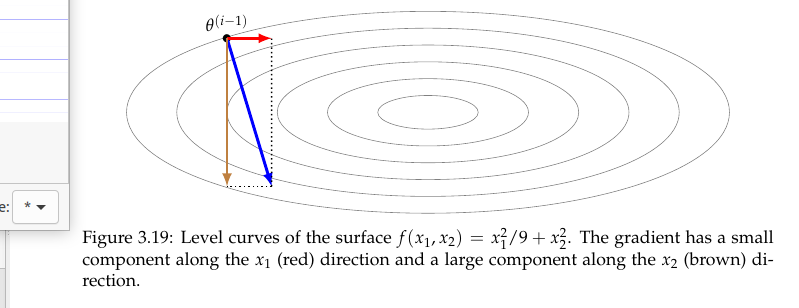

La idea de AdaGrad es hacer una adapacion que compense por el hecho de que las componentes del gradiente son mas grandes en una direccion que en otra (como lo muestra la figura).

Se define un eta vectorial (hasta el momento $\eta$ es escalar y constante. Aca va a ser vectorial y variable).

$$ \eta^{(i)} = \frac{\eta}{\sqrt{G^{(i)} + \epsilon}}$$

donde
$$ G^{(i)} = \sum_{j=0}^i g^{(j)} \circ g^{(j)}  $$

Observe que $\circ$ es el producto Hadamard de 
$g^{(j)}$ con $g^{(j)}$.  De esta forma
este producto es un gradiente de cuadrados. 
Pero $j$ aca es la **historia** a lo largo de las iteraciones. $j$ no es la componente $j$ de $g$ , $j$ 
es la iteracion al momento. O sea que $G^{(i)}$ es una
suma de *historias* (cuadradas) de evolucion del gradiente.

De otra forma

$$ G^{(i)} = ( \| g_1 \|^2, \| g_2 \|^2,  \cdots, \| g_n \|^2) $$
con
$$ g_k = (g_k^{(1)}, g_k^{(2)} , \cdots, g_k^{(i)})$$,
con $i=1,2, \cdots, n$. 



$\eta^{(i)}$ es un vector y sus componentes son:

$$ \eta_k^{(i)} = \frac{\eta}{\sqrt{ G_k^{(i)} + \epsilon}} $$
el objeto de $\epsilon$ es evitar la division por 0. 

Una vez obtenido $\eta^{(i)}$ el algoritmo es:

$$ \theta^{(i)} = \theta^{(i-1)} - \eta^{(i)} \circ g^{(i)}$$

Limitaciones y atributos del AdaGrad:

* El $\eta^{(i)}$ es variable
* El $\eta^{(i)}$ es un vector (no escalar)
* En denominador de $\eta^{(i)}$ hay una suma sobre la historia (evolucion de la trayectoria). Esa suma podria crecer mucho y hacer que el $\eta^{(i)}$ se muy pequeno y el sistema para de aprender 

$$ \theta^{(i)} = \theta^{(i-1)} - \eta^{(i)} \circ g^{(i)}$$

Si $\eta^{(i)}$ es muy pequeno $\theta^{(i)} \approx \theta^{(i-1)}$ .

Una forma de evitar esto es tomar solo una ventana para la historia y no toda la historia desde 0.




Aparace el

### AdaDelta
Matthew D. Zeiler en 2012.

En ver hacer la suma sobre toda la historia se hace sobre una ventana.

$$G^{(i)} = \sum_{j = \max{i-w, 0} }^i g^{(j)} \circ g^{(j)}  $$
Si $w=0$, se suma solo una muestra, local. 
La suma seria entre $i$ e $i$.

Si $w>0$ entonces existe en la suma una historia hasta que
$w=i$ que es contarla toda desde 0.




El metodo siguiente (lo explico en la segunda parte de esta clase) toma partes del AdaGrad y el momento y los combina.

### RMSprop  (Root Mean Square propagation)
No hay un articulo asociado a este metodo pero aparece un
clase de cursera por Geoffrey Hinton. 

La idea como se dijo antes es integrar el momentum con el AdaGrad. El Adagrad presenta el problema de que el denominador de $\eta^{(i)}$ puede crecer "sin limites" haciendo que se detenga el aprendizaje. Aparecio el AdaDelta par curar esto peor ahora el RMSprop propone otra solucion.

Con el metodo del momentum se obtiene  un promedio exponencial dedadente. 

Al grano:

$$ v^{(i)} = \beta v^{(i-1)} + (1-\beta) g^{(i)} \circ g^{(i)}  $$

$$ \theta^{(i)} = \theta^{(i-1)} - \frac{\eta}{\sqrt{v^{(i)} + \epsilon}}$$

### Adam: (Adaptive moments).
Kingma and Ba in 2017.

Que es nuevo aca? incorpora dos momentos. 

Veamos las ecuaciones:

\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1 - \beta_2) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
\theta^{(i)}  &=& \theta^{(i-1)} - \frac{\eta s^{(i)}}{ \sqrt{t^{(i)} + \epsilon }}
\end{eqnarray}

Los autores de ADAM no se quedan ahi.  Sugieren que $\beta_1 =0.9$, $\beta_2 =0.999$.
Asumen que $s^{(0)}= t^{(0)}=0$.

\begin{eqnarray}
 s^{(1)} = 0.1 g^{(1)} \\
 t^{(1)} = 0.001 g^{(1)} \circ g^{(1)} \\
 \theta^{(1)} = \theta^{(0)} - \frac{\eta}{\sqrt{t^{(1)} + \epsilon}}
\end{eqnarray}





Esos valores de $0.001$  ES MUY BAJO. Ellos proponen una normalizacion.
\begin{eqnarray}
s^{(i)} &=& \beta_1 s^{(i-1)} + (1 - \beta_2) g^{(i)} \\
t^{(i)} &=& \beta_2 t^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} \\
s^{(i)} &\leftarrow &  \frac{s^{(i)}}{\sqrt{1 - \beta_1^2}}  \\
t^{(i)} &\leftarrow & \frac{t^{(i)}}{{1 - \beta_2^2} } \\
\theta^{(i)}  &=& \theta^{(i-1)} - \frac{\eta s^{(i)}}{ \sqrt{t^{(i)} + \epsilon }}
\end{eqnarray}

Esto es muy heuristico (prueba y error)

\begin{eqnarray}
s^{(1)} = \frac{0.1 g^{(1)}}{0.18} \approx 0.526 g^{(1)} \\
t^{(1)} = \frac{0.001 g^{(1)} \circ g^{(1)}}{0.001999} \approx 0.5 g^{(1)} \circ g^{(1)}
\end{eqnarray}


[codigos con estos medodos](https://agustinus.kristia.de/techblog/2016/06/22/nn-optimization/)

La forma de encontrar estos codigos todos ya en python organizado es en Github:

[Codigos en Github](https://gist.github.com/wiseodd/85ad008aef5585cec017f4f1e6d67a02)

[Funciones Para Optimizacion]()https://en.wikipedia.org/wiki/Test_functions_for_optimization

[Rosenbrok]()https://en.wikipedia.org/wiki/Rosenbrock_function

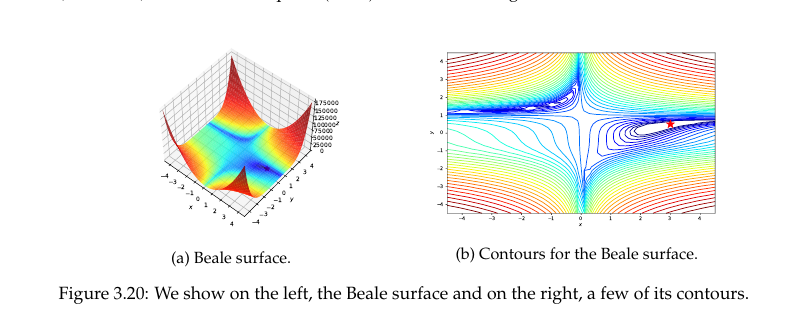






[demo](https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif)

Ojo area:

[Codigos en Numpy](https://github.com/ilguyi/optimizers.numpy)

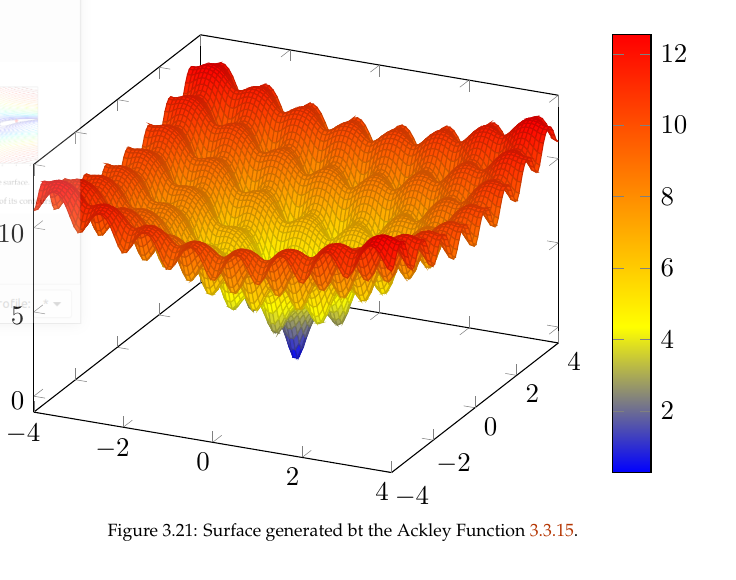

La ecuacion de la Ackley function y la Rastrigin (abajo) estan en las notas de clase.


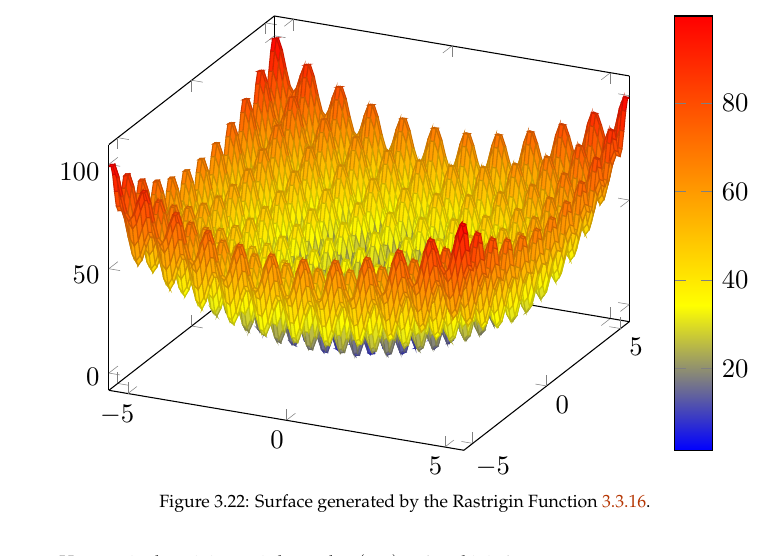